Contoh Data:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2



Label unik: ['setosa' 'versicolor' 'virginica']

Statistik Deskriptif:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


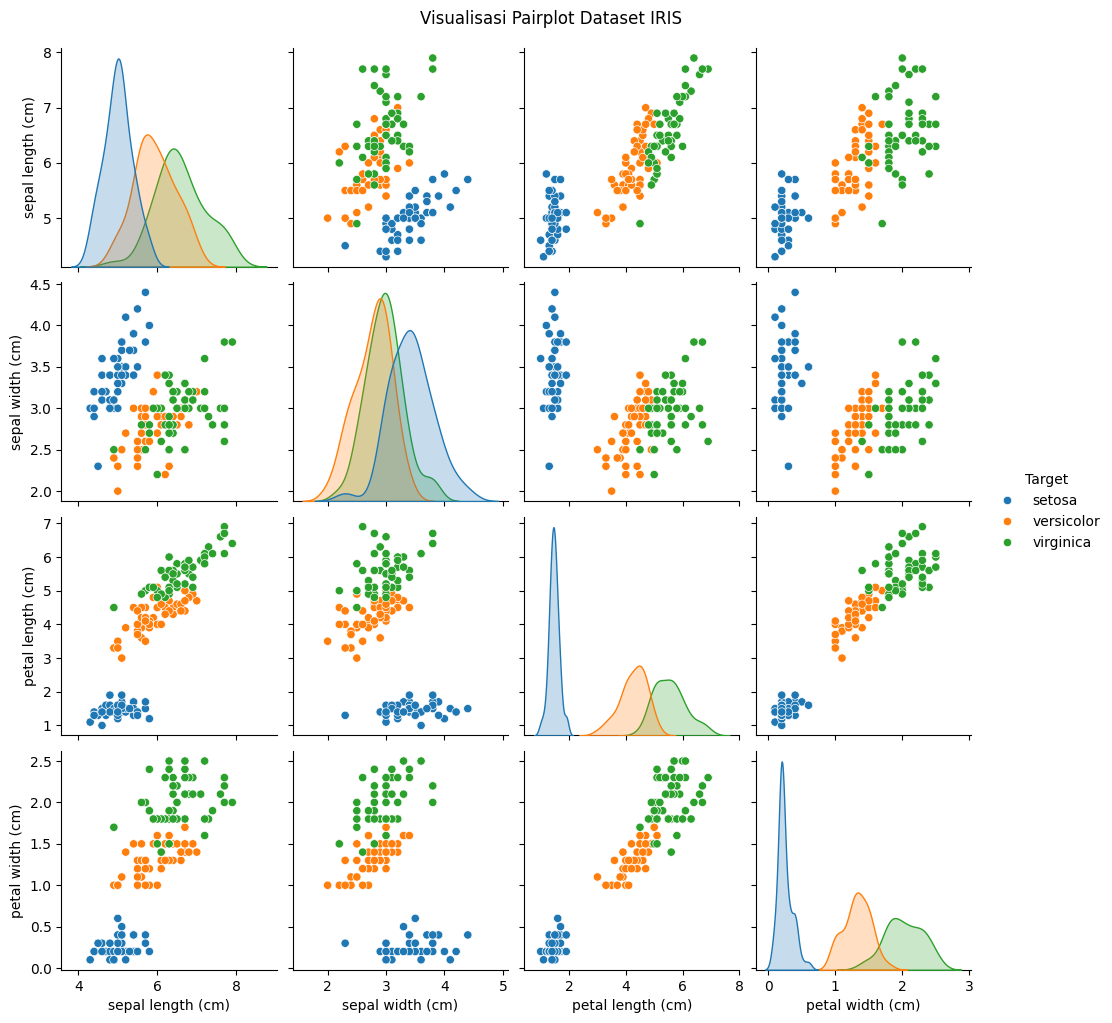


=== Logistic Regression ===
Confusion Matrix:
[[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]
Accuracy: 0.9333
Precision: 0.9333
Recall: 0.9333
F1-Score: 0.9333

=== Decision Tree ===
Confusion Matrix:
[[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]
Accuracy: 0.9333
Precision: 0.9333
Recall: 0.9333
F1-Score: 0.9333


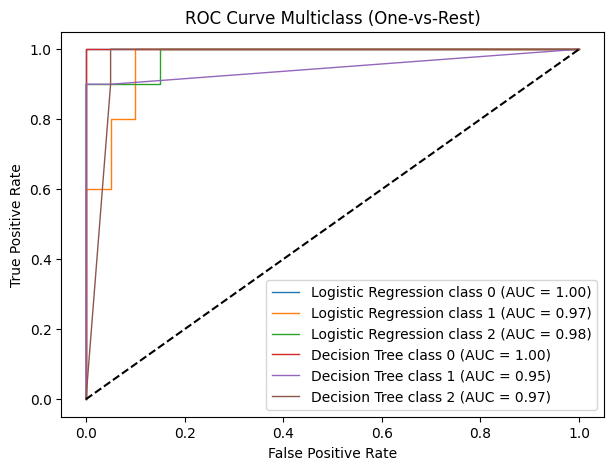


Perbandingan Hasil Model:


,Logistic Regression,Decision Tree
Accuracy,0.933333,0.933333
Precision,0.933333,0.933333
Recall,0.933333,0.933333
F1-Score,0.933333,0.933333



Model dengan performa terbaik berdasarkan akurasi adalah: Logistic Regression


In [1]:
# ============================================
# TUGAS KLASIFIKASI
# Nama : Aditya Eka Purnama
# Dataset : IRIS
# ============================================

# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
)
from sklearn.multiclass import OneVsRestClassifier

# ============================================
# 1. Memuat Dataset IRIS
# ============================================
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target)

print("Contoh Data:")
display(X.head())
print("\nLabel unik:", iris.target_names)

# ============================================
# 2. EDA & Preprocessing
# ============================================
print("\nStatistik Deskriptif:")
display(X.describe())

sns.pairplot(pd.DataFrame(X).assign(Target=y.map(lambda i: iris.target_names[i])), hue="Target")
plt.suptitle("Visualisasi Pairplot Dataset IRIS", y=1.02)
plt.show()

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Normalisasi
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ============================================
# 3. Model Klasifikasi
# ============================================
models = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}

results = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='macro')
    rec = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')

    results[name] = [acc, prec, rec, f1]

    print(f"\n=== {name} ===")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1-Score: {f1:.4f}")

# ============================================
# 4. ROC Curve (One-vs-Rest untuk multiclass)
# ============================================
y_bin = label_binarize(y_test, classes=[0,1,2])
plt.figure(figsize=(7,5))

for name, model in models.items():
    y_score = OneVsRestClassifier(model).fit(X_train_scaled, y_train).predict_proba(X_test_scaled)
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(3):
        fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
        plt.plot(fpr[i], tpr[i], lw=1, label=f'{name} class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0,1], [0,1], 'k--')
plt.title("ROC Curve Multiclass (One-vs-Rest)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

# ============================================
# 5. Perbandingan Hasil
# ============================================
result_df = pd.DataFrame(results, index=["Accuracy", "Precision", "Recall", "F1-Score"])
print("\nPerbandingan Hasil Model:")
display(result_df)

# Kesimpulan sederhana
best_model = result_df.loc["Accuracy"].idxmax()
print(f"\nModel dengan performa terbaik berdasarkan akurasi adalah: {best_model}")
